In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


reg=keras.regularizers.l2(0.0005)
model=Sequential()

model.add(Conv2D(300,(3,3),input_shape=data.shape[1:], kernel_regularizer=reg, bias_regularizer=reg))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(200,(3,3), kernel_regularizer=reg, bias_regularizer=reg))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers
model.add(Dropout(0.4))

model.add(Conv2D(100,(3,3), kernel_regularizer=reg, bias_regularizer=reg))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The third convolution layer followed by Relu and MaxPooling layers
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.4))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(600,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tasneem/ana

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1, random_state=5)

In [5]:
#model.load_weights('cnnface_mask_detection_1.h5')
checkpoint = ModelCheckpoint('cnnface_mask_detection_1.h5',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=35,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/35
990/990 [==============================] - 3s 3ms/step - loss: 0.0766 - acc: 0.9879 - val_loss: 0.0555 - val_acc: 0.9919

Epoch 00001: val_loss improved from inf to 0.05549, saving model to cnnface_mask_detection_1.h5
Epoch 2/35
990/990 [==============================] - 3s 3ms/step - loss: 0.0592 - acc: 0.9909 - val_loss: 0.0520 - val_acc: 0.9879

Epoch 00002: val_loss improved from 0.05549 to 0.05199, saving model to cnnface_mask_detection_1.h5
Epoch 3/35
990/990 [==============================] - 3s 3ms/step - loss: 0.0518 - acc: 0.9909 - val_loss: 0.0728 - val_acc: 0.9839

Epoch 00003: val_loss did not improve from 0.05199
Epoch 4/35
990/990 [==============================] - 3s 3ms/step - loss: 0.0800 - acc: 0.9768 - val_loss: 0.0536 - val_acc: 0.9879

Epoch 00004: val_loss did not improve from 0.05199
Epoch 5/35
990/990 [==============================] - 3s 3ms/step - loss: 0.0481 - acc: 0.9960 - val_loss: 0.0599 - val_acc:

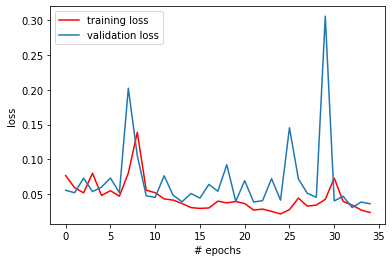

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

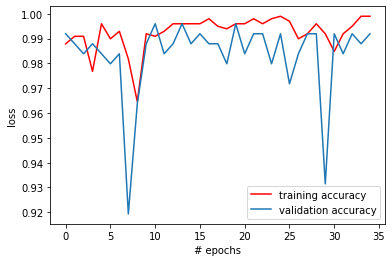

In [8]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 0s 2ms/step
[0.20217673467013283, 0.9855072463768116]
